<a href="https://colab.research.google.com/github/Prima-Rizky/analisis-data/blob/main/proyek_sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LANGKAH 1 : Kode untuk Mengimpor Library dan Membaca Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
file_path = '/content/amazon.csv'
amazon_data = pd.read_csv(file_path)

# Menampilkan data awal
print(amazon_data.head())
print(amazon_data.info())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

Langkah 2: Pembersihan Data


In [ ]:
# Membersihkan kolom harga dan diskon
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].str.replace('%', '').astype(float)

# Membersihkan kolom rating
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Membersihkan kolom rating count
amazon_data['rating_count'] = amazon_data['rating_count'].str.replace(',', '').astype(float)

# Menampilkan informasi setelah pembersihan
print(amazon_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Langkah 3: Analisis Deskriptif

In [ ]:
# Statistik deskriptif untuk kolom numerik yang relevan
print(amazon_data[['discounted_price', 'actual_price', 'discount_percentage', 'rating']].describe())

# Menemukan produk dengan diskon tertinggi
max_discount = amazon_data.loc[amazon_data['discount_percentage'].idxmax()]
print("Produk dengan diskon tertinggi:", max_discount['product_name'], "-", max_discount['discount_percentage'], "%")

# Menemukan produk dengan harga tertinggi
max_price = amazon_data.loc[amazon_data['actual_price'].idxmax()]
print("Produk dengan harga tertinggi:", max_price['product_name'], "-", max_price['actual_price'])


       discounted_price   actual_price  discount_percentage       rating
count       1465.000000    1465.000000          1465.000000  1464.000000
mean        3125.310874    5444.990635            47.691468     4.096585
std         6944.304394   10874.826864            21.635905     0.291674
min           39.000000      39.000000             0.000000     2.000000
25%          325.000000     800.000000            32.000000     4.000000
50%          799.000000    1650.000000            50.000000     4.100000
75%         1999.000000    4295.000000            63.000000     4.300000
max        77990.000000  139900.000000            94.000000     5.000000
Produk dengan diskon tertinggi: rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver - 94.0 %
Produk dengan harga tertinggi: Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Blac

Langkah 4: Visualisasi Data

Distribusi Harga Diskon

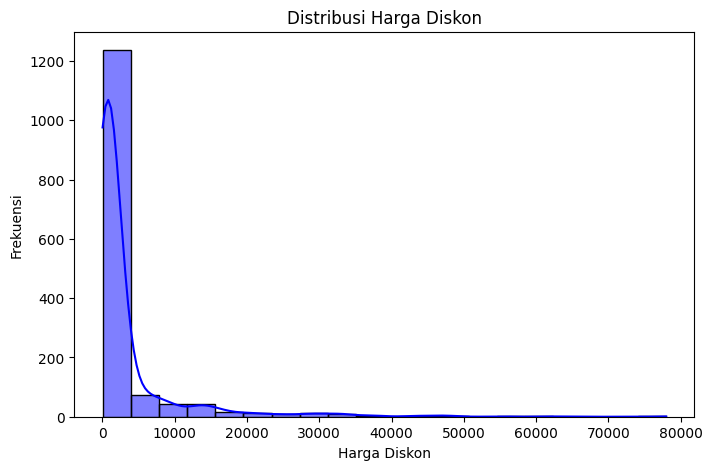

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(amazon_data['discounted_price'], bins=20, color='blue', kde=True)
plt.title('Distribusi Harga Diskon')
plt.xlabel('Harga Diskon')
plt.ylabel('Frekuensi')
plt.show()


Hubungan Diskon dengan Rating

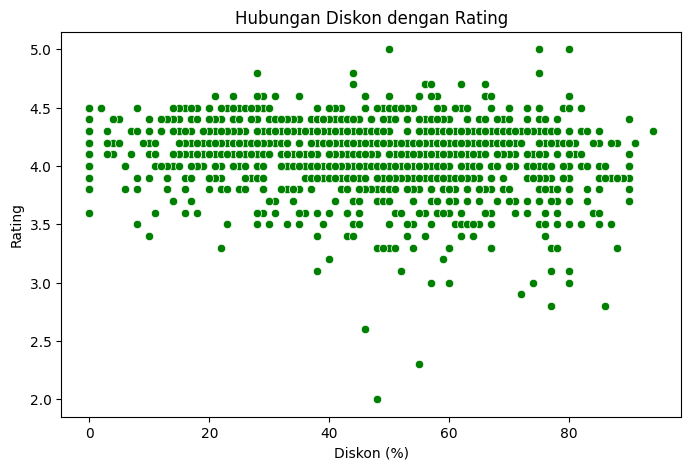

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=amazon_data, x='discount_percentage', y='rating', color='green')
plt.title('Hubungan Diskon dengan Rating')
plt.xlabel('Diskon (%)')
plt.ylabel('Rating')
plt.show()


Distribusi Rating Produk

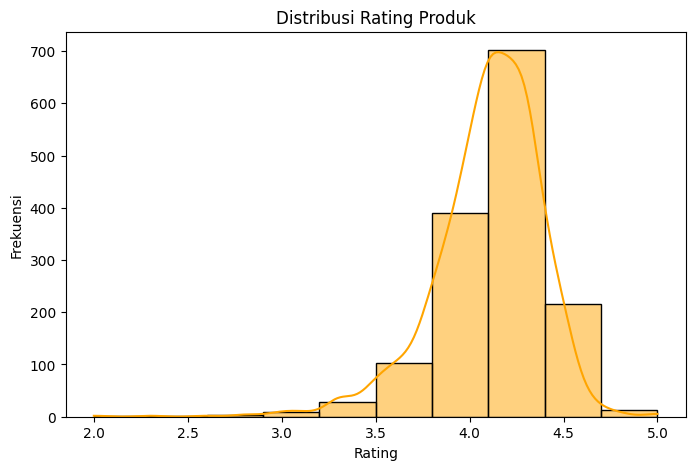

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(amazon_data['rating'], bins=10, color='orange', kde=True)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()
